In [1]:
import sklearn
import glob
import pickle
import os
import cv2
import skimage
import numpy as np
from skimage import io
from skimage import data,color,exposure
from matplotlib import pyplot as plt
from collections import deque
from scipy.ndimage.measurements import label
from keras.models import Sequential
from keras.layers import Dense, Dropout,Convolution2D,Flatten,Input,Conv2D, MaxPooling2D,Lambda
from keras import optimizers
from keras.layers.normalization import BatchNormalization
from keras.models import Model
from sklearn.model_selection import train_test_split
from moviepy.editor import VideoFileClip
from IPython.display import HTML
from skimage.transform import resize

In [2]:
arabalar=glob.glob('./vehicles/**/*.png', recursive=True)
araba_yok=glob.glob('./non-vehicles/**/*.png', recursive=True)

In [3]:
arabalar

['./vehicles\\vehicles\\GTI_Far\\image0000.png',
 './vehicles\\vehicles\\GTI_Far\\image0001.png',
 './vehicles\\vehicles\\GTI_Far\\image0002.png',
 './vehicles\\vehicles\\GTI_Far\\image0003.png',
 './vehicles\\vehicles\\GTI_Far\\image0004.png',
 './vehicles\\vehicles\\GTI_Far\\image0005.png',
 './vehicles\\vehicles\\GTI_Far\\image0006.png',
 './vehicles\\vehicles\\GTI_Far\\image0007.png',
 './vehicles\\vehicles\\GTI_Far\\image0008.png',
 './vehicles\\vehicles\\GTI_Far\\image0009.png',
 './vehicles\\vehicles\\GTI_Far\\image0010.png',
 './vehicles\\vehicles\\GTI_Far\\image0014.png',
 './vehicles\\vehicles\\GTI_Far\\image0015.png',
 './vehicles\\vehicles\\GTI_Far\\image0016.png',
 './vehicles\\vehicles\\GTI_Far\\image0018.png',
 './vehicles\\vehicles\\GTI_Far\\image0019.png',
 './vehicles\\vehicles\\GTI_Far\\image0021.png',
 './vehicles\\vehicles\\GTI_Far\\image0022.png',
 './vehicles\\vehicles\\GTI_Far\\image0023.png',
 './vehicles\\vehicles\\GTI_Far\\image0024.png',
 './vehicles\\vehicl

In [4]:
X=[]
for file in arabalar:
  X.append(skimage.io.imread(file))
for file in araba_yok:
  X.append(skimage.io.imread(file))
X=np.array(X)

In [5]:
X.shape

(17760, 64, 64, 3)

In [6]:
y=np.concatenate([np.ones(len(arabalar)),np.zeros(len(araba_yok))])

In [7]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=42)

In [8]:
X.shape, X_train.shape,y.shape

((17760, 64, 64, 3), (15984, 64, 64, 3), (17760,))

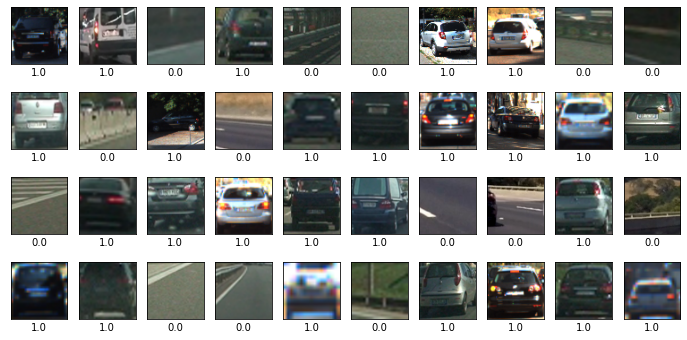

In [9]:
def showImages():
  fig=plt.figure(figsize=(12,6))
  for i in range(0,40):
    number=np.random.randint(0,len(X_train))
    axis=fig.add_subplot(4,10,i+1)
    axis.set_xlabel(y_train[number])
    plt.xticks(np.array([]))
    plt.yticks(np.array([]))
    axis.imshow(X_train[number])
  plt.show()
showImages()

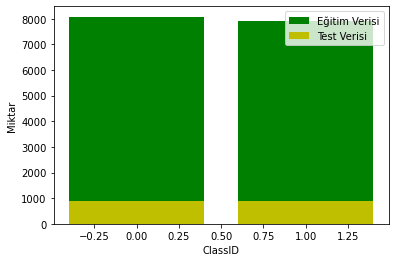

In [10]:
def veri():
  _, training_counts=np.unique(y_train,return_counts=True)
  _, test_counts=np.unique(y_test,return_counts=True)
  plt.bar(np.arange(2),training_counts,color='g',label='Eğitim Verisi')
  plt.bar(np.arange(2),test_counts,color='y',label='Test Verisi')
  plt.xlabel('ClassID')
  plt.ylabel('Miktar')
  plt.legend()
  plt.show()
veri()

In [11]:
def tgbNet(inputShape=(64,64,3)):
  model=Sequential()
  model.add(Lambda(lambda x:x/127.5-1,input_shape=inputShape, output_shape=inputShape))
  model.add(Conv2D(filters=16,kernel_size=(3,3),activation='relu',name='cv0',input_shape=inputShape,padding='same'))
  model.add(Dropout(0.5))
  model.add(Conv2D(filters=32,kernel_size=(3,3),activation='relu',name='cv1',input_shape=inputShape,padding='same'))
  model.add(Dropout(0.5))
  model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu',name='cv2',input_shape=inputShape,padding='same'))
  model.add(MaxPooling2D(pool_size=(8,8)))
  model.add(Dropout(0.5))
  model.add(Conv2D(filters=1,kernel_size=(8,8),name='fcn',activation='sigmoid'))
  return model
model=tgbNet()
model.summary()
model.add(Flatten())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lambda (Lambda)              (None, 64, 64, 3)         0         
_________________________________________________________________
cv0 (Conv2D)                 (None, 64, 64, 16)        448       
_________________________________________________________________
dropout (Dropout)            (None, 64, 64, 16)        0         
_________________________________________________________________
cv1 (Conv2D)                 (None, 64, 64, 32)        4640      
_________________________________________________________________
dropout_1 (Dropout)          (None, 64, 64, 32)        0         
_________________________________________________________________
cv2 (Conv2D)                 (None, 64, 64, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 8, 8, 64)          0

Epoch 1/20
400/400 [==============================] - 130s 318ms/step - loss: 0.1584 - accuracy: 0.7708 - val_loss: 0.0355 - val_accuracy: 0.9559
Epoch 2/20
400/400 [==============================] - 130s 325ms/step - loss: 0.0355 - accuracy: 0.9544 - val_loss: 0.0174 - val_accuracy: 0.9794
Epoch 3/20
400/400 [==============================] - 137s 341ms/step - loss: 0.0254 - accuracy: 0.9665 - val_loss: 0.0140 - val_accuracy: 0.9819
Epoch 4/20
400/400 [==============================] - 143s 357ms/step - loss: 0.0209 - accuracy: 0.9739 - val_loss: 0.0126 - val_accuracy: 0.9862
Epoch 5/20
400/400 [==============================] - 148s 371ms/step - loss: 0.0165 - accuracy: 0.9787 - val_loss: 0.0109 - val_accuracy: 0.9865
Epoch 6/20
400/400 [==============================] - 153s 384ms/step - loss: 0.0172 - accuracy: 0.9773 - val_loss: 0.0203 - val_accuracy: 0.9750
Epoch 7/20
400/400 [==============================] - 169s 422ms/step - loss: 0.0178 - accuracy: 0.9785 - val_loss: 0.0451 -

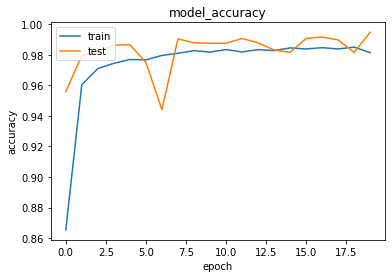

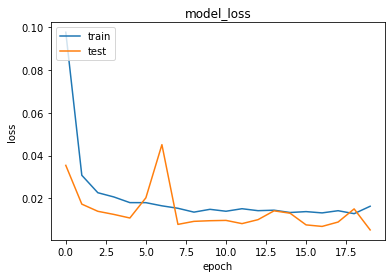

In [12]:
def plot_results(history):
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title('model_accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train','test'],loc='upper left')
  plt.show()
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('model_loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train','test'],loc='upper left')
  plt.show()
model.compile(loss='mse',optimizer='rmsprop',metrics=['accuracy'])
history=model.fit(X_train,y_train,batch_size=32,epochs=20,validation_split=0.2,verbose=1)
plot_results(history)


In [13]:
model.save_weights('ulasim.h5')
print("Model Ağırlıkları Kaydedildi!")

Model Ağırlıkları Kaydedildi!


1/1 - 0s
Araba olmayanların tahmin değeri:4.25186e-07


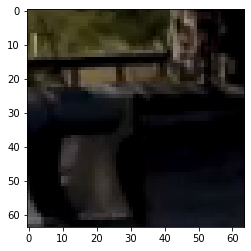

In [98]:
rand=np.random.randint(X_test.shape[0])
plt.imshow(X_test[rand])
sample=np.reshape(X_test[rand],(1,64,64,3))
prediction=model.predict(sample,batch_size=64,verbose=2)
prediction=prediction[0][0]
if prediction>=0.5:
  print("Araba tahmin değeri:"+str(prediction))
else:
  print("Araba olmayanların tahmin değeri:"+str(prediction))

In [89]:
img=skimage.io.imread('test_images/test4.jpg')

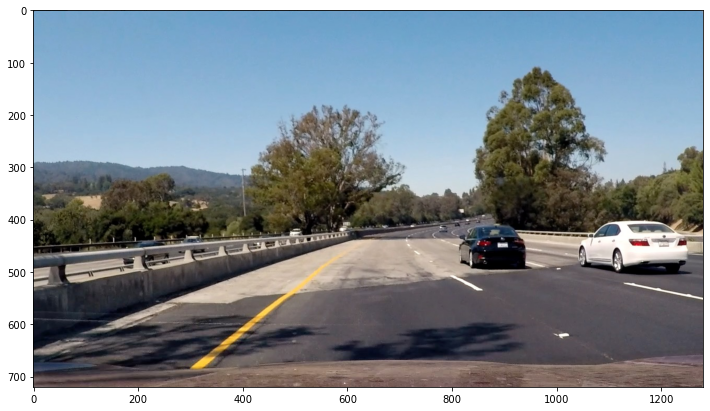

In [16]:
fig=plt.figure(figsize=(12,20))
plt.imshow(img)

In [17]:
def draw_boxes(img, bboxes,color=(0,0,255), thick=6):
    draw_img=np.copy(img)
    for bbox in bboxes:
        cv2.rectangle(draw_img,bbox[0],bbox[1],color,thick)
    return draw_img

In [18]:
def search_cars(img):
    cropped=img[400:660,0:1280]
    heat=heatmodel.predict(cropped.reshape(1,cropped.shape[0],cropped.shape[1],cropped.shape[2]))
    xx, yy=np.meshgrid(np.arange(heat.shape[2]),np.arange(heat.shape[1]))
    x=(xx[heat[0,:,:,0]>0.9999999])
    y=(yy[heat[0,:,:,0]>0.9999999])
    hot_windows=[]
    for i,j in zip(x,y):
        hot_windows.append(((i*8,400+j*8),(i*8+64,400+j*8+64)))
    return hot_windows


In [19]:
heatmodel=tgbNet((260,1280,3))

In [20]:
heatmodel.load_weights('./ulasim.h5')

In [21]:
hot_windows=search_cars(img)

In [22]:
window_img=draw_boxes(img,hot_windows,(0,255,0),6)

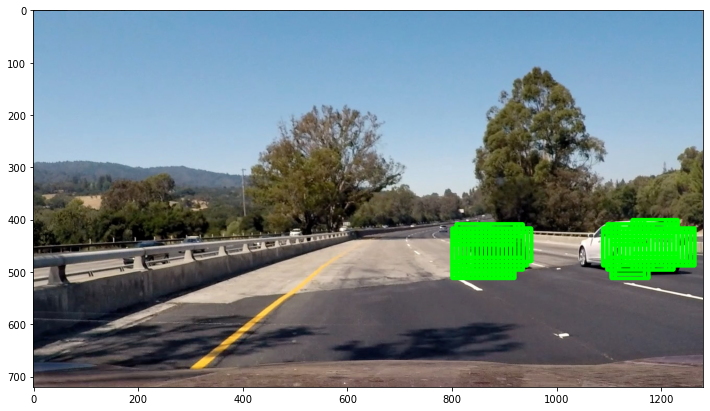

In [23]:
fig=plt.figure(figsize=(12,20))
plt.imshow(window_img)

In [24]:
def add_heat(heatmap, bbox_list):
    for box in bbox_list:
        heatmap[box[0][1]:box[1][1], box[0][0]:box[1][0]] += 1
    return heatmap

In [25]:
def apply_threshold(heatmap,threshold):
    heatmap[heatmap<= threshold]=0
    return heatmap

In [26]:
def draw_labeled_bboxes(img, labels):
    for car_number in range(1, labels[1]+1):
        nonzero = (labels[0] == car_number).nonzero()
        nonzeroy = np.array(nonzero[0])
        nonzerox = np.array(nonzero[1])
        bbox = ((np.min(nonzerox), np.min(nonzeroy)), (np.max(nonzerox), np.max(nonzeroy)))
        cv2.rectangle(img, bbox[0], bbox[1], (0,255,0), 6)
    return img


In [27]:
heat=np.zeros_like(img[:,:,0]).astype(np.float)

In [28]:
heat=add_heat(heat,hot_windows)

In [29]:
heat=apply_threshold(heat,3)

In [30]:
heatmap=np.clip(heat,0,255)

In [31]:
boxes=label(heatmap)

In [32]:
draw_img=draw_labeled_bboxes(np.copy(img),boxes)

2 Araba Bulundu


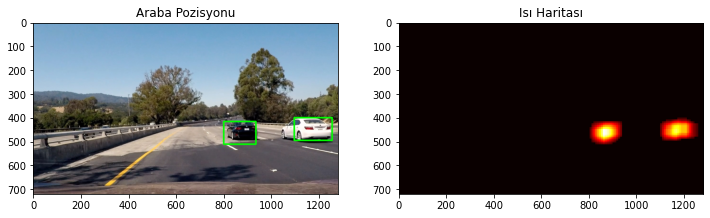

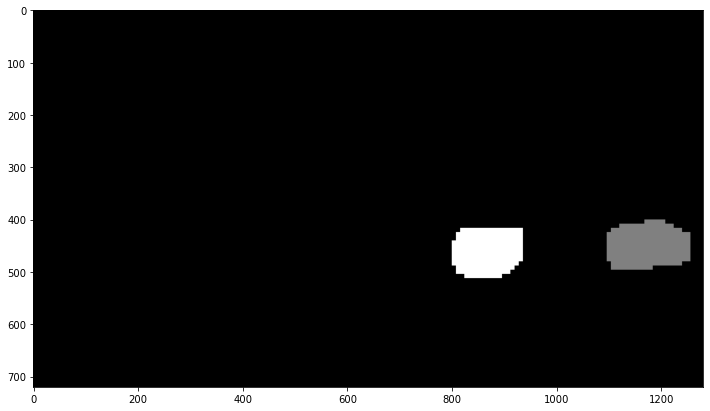

In [58]:
fig=plt.figure(figsize=(12,20))
plt.subplot(121)
plt.imshow(draw_img)
plt.title('Araba Pozisyonu')
plt.subplot(122)
plt.imshow(heatmap,cmap='hot')
plt.title('Isı Haritası')
print(boxes[1],'Araba Bulundu')
fig=plt.figure(figsize=(12,20))
plt.imshow(boxes[0],cmap=('gray'))
               

In [59]:


src_points = np.float32([[0 , 720],
                         [1280 , 720],
                         [750 , 470],
                         [530 , 470]])


dst_points = np.float32([[320 , 720],
                         [960 , 720],
                         [960 , 0],
                         [320 , 0]])

In [60]:
prev_frames = []
prev_curvatures = []
prev_car_off = []

In [61]:
def region_of_interest(img,vertices):
    mask = np.zeros_like(img)   
    if len(img.shape) > 2:
        channel_count = img.shape[2]  
        ignore_mask_color = (255,) * channel_count
    else:
        ignore_mask_color = 255   
    cv2.fillPoly(mask, vertices, ignore_mask_color)
    masked_image = cv2.bitwise_and(img, mask)
    return masked_image

In [62]:
def applyTransformation(img):
    M = cv2.getPerspectiveTransform(src_points, dst_points)
    transformed = cv2.warpPerspective(img, M, (img.shape[1], img.shape[0]))
    return transformed

In [63]:
def abs_sobel_thresh(img, orient='x', thresh_min=0, thresh_max=255):
    if orient == 'x':
        abs_sobel = np.absolute(cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=3))
    if orient == 'y':
        abs_sobel = np.absolute(cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=3))
    scaled_sobel = np.uint8(255*abs_sobel/np.max(abs_sobel))
    binary_output = np.zeros_like(scaled_sobel)
    binary_output[(scaled_sobel >= thresh_min) & (scaled_sobel <= thresh_max)] = 1
    return binary_output

In [64]:
def mag_thresh(img, thresh_min=0, thresh_max=255):
    
    sobelx = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=9)
    sobely = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=9)
    gradmag = np.sqrt(sobelx**2 + sobely**2)
    scale_factor = np.max(gradmag)/255 
    gradmag = (gradmag/scale_factor).astype(np.uint8) 
    binary_output = np.zeros_like(gradmag)
    binary_output[(gradmag >= thresh_min) & (gradmag <= thresh_max)] = 1
    return binary_output

In [65]:
def applySobelMask(img):
    hls = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
    l_channel = hls[:,:,1]
    s_channel = hls[:,:,2]
    l_channel_sobel_x = abs_sobel_thresh(l_channel,'x', 20, 200)
    s_channel_sobel_x = abs_sobel_thresh(s_channel,'x', 60, 200)
    sobel_combined_x = cv2.bitwise_or(s_channel_sobel_x, l_channel_sobel_x)
    l_channel_mag = mag_thresh(l_channel, 80, 200)
    s_channel_mag = mag_thresh(s_channel, 80, 200)
    mag_combined = cv2.bitwise_or(l_channel_mag, s_channel_mag)
    mask_combined = cv2.bitwise_or(mag_combined, sobel_combined_x)
    mask_combined = region_of_interest(mask_combined, np.array([[(330, 0),(950, 0), (950, 680), (330, 680)]]))

    return mask_combined

In [66]:
def applyColorMask(img):
    img_hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
    white_low = np.array([[[0, 0, 210]]])
    white_high = np.array([[[255, 30, 255]]])
    yellow_low = np.array([[[18, 80, 80]]])
    yellow_high = np.array([[[30, 255, 255]]])
    white_mask = cv2.inRange(img_hsv, white_low, white_high)
    yellow_mask = cv2.inRange(img_hsv, yellow_low, yellow_high)
    color_mask = cv2.bitwise_or(yellow_mask, white_mask)
    return color_mask

In [67]:

def combineMasks(sobel_mask, color_mask):
    mask_combined = np.zeros_like(sobel_mask)
    mask_combined[(color_mask>=.5)|(sobel_mask>=.5)] = 1
    return mask_combined

In [68]:
def window_mask(width, height, img_ref, center,level):
    output = np.zeros_like(img_ref)
    output[int(img_ref.shape[0]-(level+1)*height):int(img_ref.shape[0]-level*height),max(0,int(center-width/2)):min(int(center+width/2),img_ref.shape[1])] = 1
    return output

In [69]:
def slidingWindow(img):
    
    window_width = 50
    window_height = 100
    margin = 30
    window_centroids = [] 
    window = np.ones(window_width) 
    l_sum = np.sum(img[int(3*img.shape[0]/5):,:int(img.shape[1]/2)], axis=0)
    l_center = np.argmax(np.convolve(window,l_sum))-window_width/2
    r_sum = np.sum(img[int(3*img.shape[0]/5):,int(img.shape[1]/2):], axis=0)
    r_center = np.argmax(np.convolve(window,r_sum))-window_width/2+int(img.shape[1]/2)

    window_centroids.append((l_center,r_center))
    for level in range(1, (int)(img.shape[0] / window_height)):
        image_layer = np.sum(img[int(img.shape[0]-(level+1)*window_height):int(img.shape[0]-level*window_height),:], axis=0)
        conv_signal = np.convolve(window, image_layer)

        offset = window_width / 2

        l_min_index = int(max(l_center+offset-margin,0))
        l_max_index = int(min(l_center+offset+margin,img.shape[1]))
        l_center = np.argmax(conv_signal[l_min_index:l_max_index])+l_min_index-offset

        r_min_index = int(max(r_center+offset-margin,0))
        r_max_index = int(min(r_center+offset+margin,img.shape[1]))
        r_center = np.argmax(conv_signal[r_min_index:r_max_index])+r_min_index-offset
        window_centroids.append((l_center,r_center))

    if len(window_centroids) == 0:
        print("No windows found in this frame!")
        return
    l_points = np.zeros_like(img)
    r_points = np.zeros_like(img)
    for level in range(0,len(window_centroids)):
        l_mask = window_mask(window_width,window_height,img,window_centroids[level][0],level)
        r_mask = window_mask(window_width,window_height,img,window_centroids[level][1],level)

        l_points[(l_points == 255) | ((l_mask == 1) ) ] = 255
        r_points[(r_points == 255) | ((r_mask == 1) ) ] = 255
    template = np.array(r_points+l_points,np.uint8)
    zero_channel = np.zeros_like(template) 
    template = np.array(cv2.merge((template, template, template)),np.uint8)
    warpage = np.array(cv2.merge((img, img, img)),np.uint8) 
    output = cv2.addWeighted(warpage, 1, template, 0.5, 0.0) 
    leftx = np.nonzero(l_points)[1]
    lefty = np.nonzero(l_points)[0]
    rightx = np.nonzero(r_points)[1]
    righty = np.nonzero(r_points)[0]
    left_fit = np.polyfit(lefty, leftx, 2)
    right_fit = np.polyfit(righty, rightx, 2)
    return left_fit, right_fit, output
    

In [70]:
def calcCurvature(left_fit, right_fit):
    ym_per_pix = 30/720 
    xm_per_pix = 3.7/700
    
    ploty = np.linspace(0, 719, num=720)
    left_fitx = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]
    right_fitx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]
    left_fit_cr = np.polyfit(ploty*ym_per_pix, left_fitx*xm_per_pix, 2)
    right_fit_cr = np.polyfit(ploty*ym_per_pix, right_fitx*xm_per_pix, 2)
   
    y_eval = 719
    left_curverad = ((1 + (2*left_fit_cr[0]*y_eval*ym_per_pix + left_fit_cr[1])**2)**1.5) / np.absolute(2*left_fit_cr[0])
    right_curverad = ((1 + (2*right_fit_cr[0]*y_eval*ym_per_pix + right_fit_cr[1])**2)**1.5) / np.absolute(2*right_fit_cr[0])
    
    curverad = (left_curverad + right_curverad) / 2
    
    prev_curvatures.append(curverad)
    avg_curverad = np.average(prev_curvatures[-10:])
    
    return avg_curverad

In [71]:
def calcCarOff(left_fit, right_fit):
    ym_per_pix = 30/720 
    xm_per_pix = 3.7/700
    
    left_intcpt = left_fit[0]*720**2 + left_fit[1]*720 + left_fit[2]
    right_intcpt = right_fit[0]*720**2 + right_fit[1]*720 + right_fit[2]

    lane_mid = (left_intcpt + right_intcpt)/2.0

    car_off = (lane_mid - 1280/2.0)*xm_per_pix

    prev_car_off.append(car_off)
    avg_car_off = np.average(prev_car_off[-10:])
    
    return avg_car_off

In [72]:
def displayInfo(img, curverad, car_off):
    font = cv2.FONT_HERSHEY_COMPLEX_SMALL
    curve_disp_txt = 'Serit Tespiti: ' + str(np.round(curverad,2)) + 'm'
    off_disp_txt = 'Araba Tespiti: ' + str(np.round(car_off,2)) + 'm'
    cv2.putText(img, curve_disp_txt, (20, 30), font, 1, (0,0,0), 2)
    cv2.putText(img, off_disp_txt, (20, 60), font, 1, (0,0,0), 2)
    return img

In [73]:
def applyBackTrans(img, left_fit, right_fit):
    ploty = np.linspace(0, 719, num=720)
    left_fitx = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]
    right_fitx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]
    
    polygon = np.zeros_like(img) 

    plot_y = np.linspace(0, img.shape[0]-1, img.shape[0])
    pts_left = np.array([np.transpose(np.vstack([left_fitx, plot_y]))])
    pts_right = np.array([np.flipud(np.transpose(np.vstack([right_fitx, plot_y])))])
    pts = np.hstack((pts_left, pts_right))

    cv2.fillPoly(polygon, np.int_([pts]), (0, 0, 255))
    
    top_dist = right_fitx[0] - left_fitx[0]
    bottom_dist = right_fitx[-1] - left_fitx[-1]

    if len(prev_frames) > 0: 
        if top_dist < 300 or bottom_dist < 300 or top_dist > 500 or bottom_dist > 500:
            polygon = prev_frames[-1]
        else:
            prev_frames.append(polygon)
    else:
        prev_frames.append(polygon)
        

    polygon_gray = cv2.cvtColor(polygon, cv2.COLOR_RGB2GRAY) 
    prev_gray = cv2.cvtColor(prev_frames[-1], cv2.COLOR_RGB2GRAY)  
    non_similarity = cv2.matchShapes(polygon_gray,prev_gray, 1, 0.0)
    if non_similarity > 0.002: 
        polygon = prev_frames[-1]

    M_inv = cv2.getPerspectiveTransform(dst_points, src_points)


    image_backtrans = cv2.warpPerspective(polygon, M_inv, (img.shape[1], img.shape[0])) 

    return np.uint8(image_backtrans)

In [74]:
def findLanes(img):   

    img_cropped = np.copy(img)
    img_cropped = region_of_interest(img_cropped, [src_points.astype(np.int32)])

    img_warped = applyTransformation(img_cropped)

    img_sobel = applySobelMask(img_warped)
    
    img_color = applyColorMask(img_warped)
    
    img_mask = combineMasks(img_sobel, img_color)
    
    left_fit, right_fit, _ = slidingWindow(img_mask)
    
    lane_mask = applyBackTrans(img, left_fit, right_fit)
    
    img_result = cv2.addWeighted(img, 1, lane_mask, 1, 0)
    
    curverad = calcCurvature(left_fit, right_fit)
    car_off = calcCarOff(left_fit, right_fit)
    img_info = displayInfo(img_result, curverad, car_off)
    return img_info

In [80]:
def process_image(img):      

    img_lanes = findLanes(img)
    
    
    heat = np.zeros_like(img[:,:,0]).astype(np.float)
    
    hot_windows = search_cars(img)

    heat = np.zeros_like(img[:,:,0]).astype(np.float)

    heat = add_heat(heat,hot_windows)
    
    heat = apply_threshold(heat, 3)
  
    heatmap = np.clip(heat, 0, 255)

    boxes = label(heatmap)

    draw_img = draw_labeled_bboxes(img_lanes, boxes)
    
    return draw_img

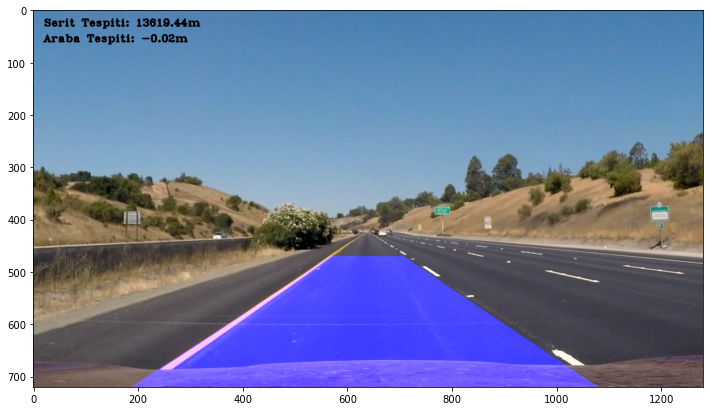

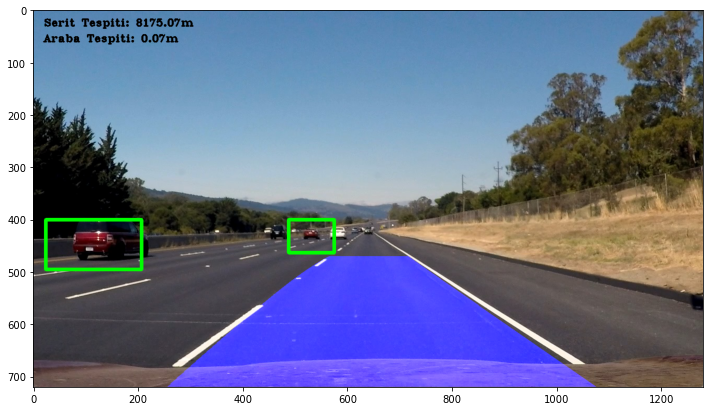

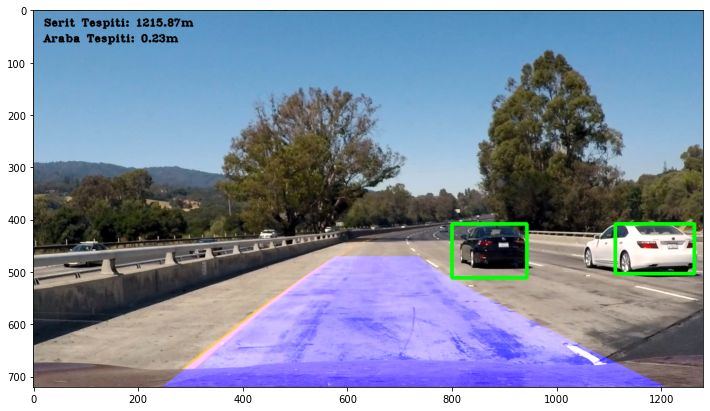

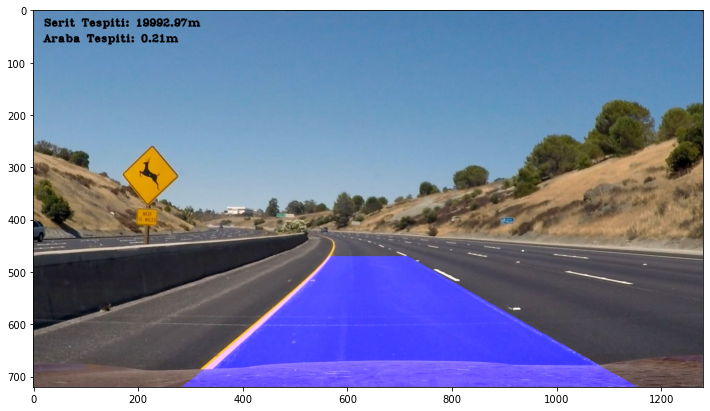

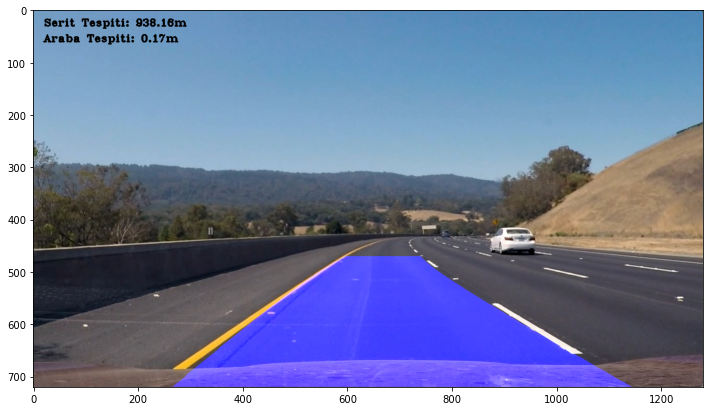

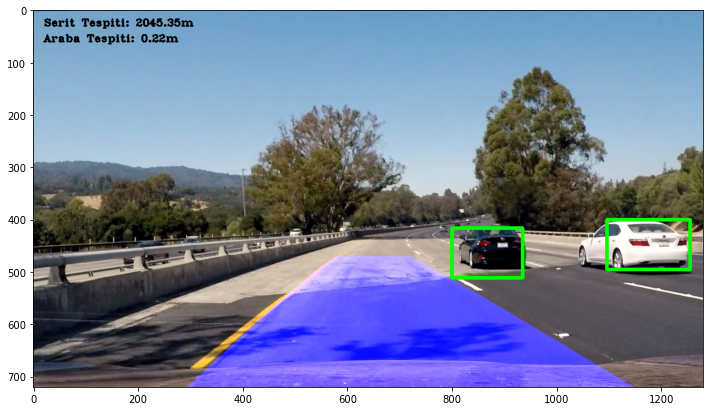

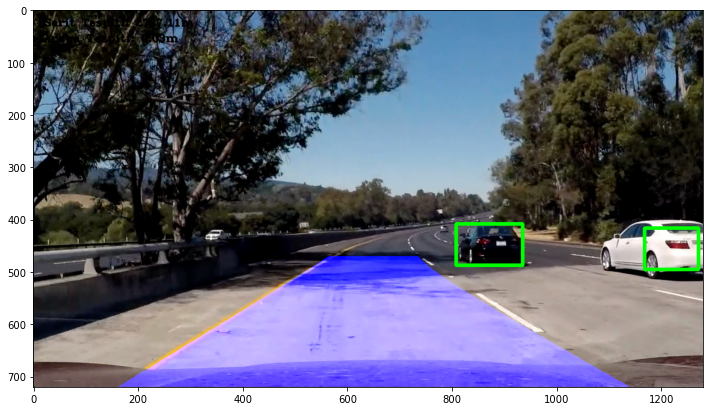

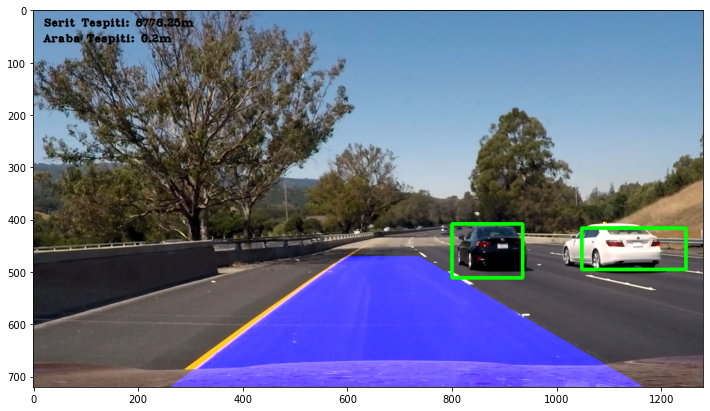

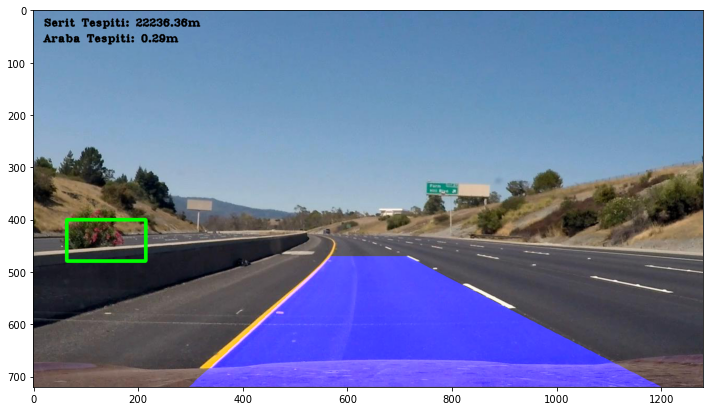

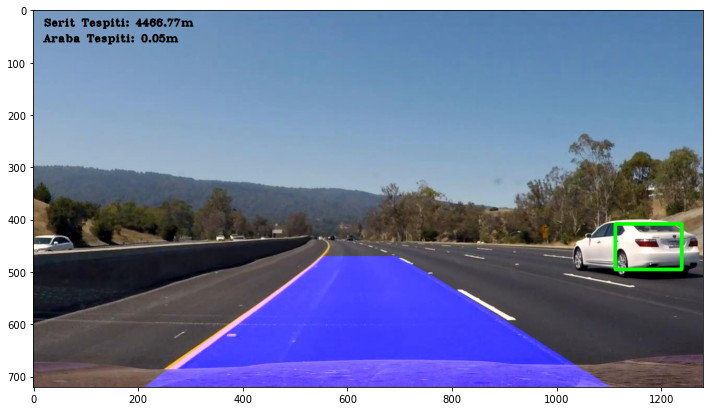

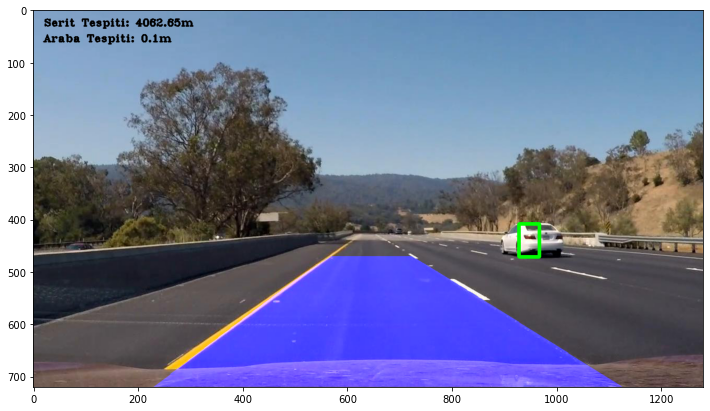

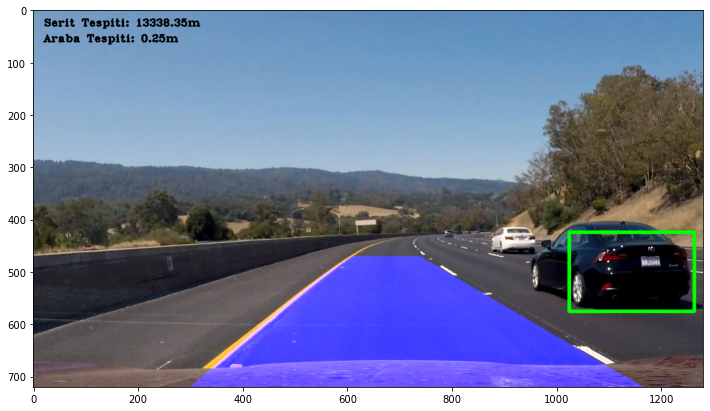

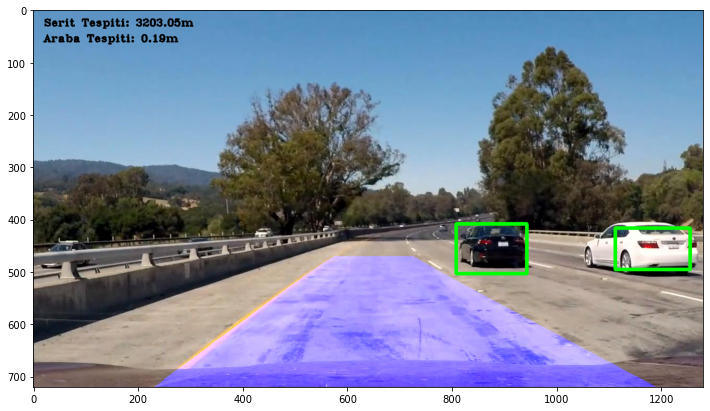

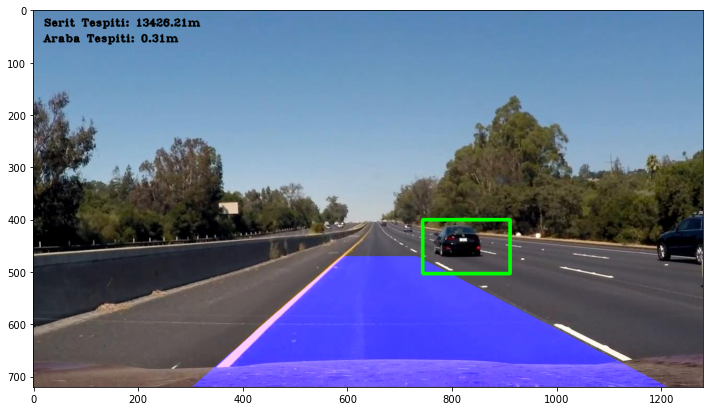

In [87]:

for index, image in enumerate(os.listdir("test/")):

    prev_frames = []
    prev_curvatures = []
    prev_car_off = []

    img =skimage.io.imread('test/' + image)

    img_lane = process_image(img)

    fig = plt.figure(figsize=(12,20))
    plt.imshow(img_lane)

    fig.savefig('./' + image, bbox_inches='tight', pad_inches=0)

In [77]:

history = None

def process_video(img):
    img_lanes = findLanes(img)
    
    heat = np.zeros_like(img[:,:,0]).astype(np.float)

    hot_windows = search_cars(img)
    heat = np.zeros_like(img[:,:,0]).astype(np.float)

    heat = add_heat(heat,hot_windows)
    
    heat = apply_threshold(heat,3)
 
    heatmap = np.clip(heat, 0, 255)

    boxes = label(heatmap)
    
    for car_number in range(1, boxes[1]+1):

        nonzero = (boxes[0] == car_number).nonzero()
        nonzeroy = np.array(nonzero[0])
        nonzerox = np.array(nonzero[1])
        history.append([np.min(nonzerox),np.min(nonzeroy),np.max(nonzerox),np.max(nonzeroy)])

    recent_boxes = np.array(history).tolist()
    boxes = cv2.groupRectangles(recent_boxes, 10, .1)
    if len(boxes[0]) != 0:
        for box in boxes[0]:
            cv2.rectangle(img_lanes, (box[0], box[1]), (box[2],box[3]), (0,255,0), 6)

    return img_lanes

In [78]:
prev_frames = []
prev_curvatures = []
prev_car_off = []

history = deque(maxlen=30)

clip_output = './video/project_video.mp4'
clip = VideoFileClip("./project_video.mp4")
clip_process = clip.fl_image(process_video)
%time clip_process.write_videofile(clip_output, audio=False)

t:   0%|          | 0/1260 [00:00<?, ?it/s, now=None]

Moviepy - Building video ./video/project_video.mp4.
Moviepy - Writing video ./video/project_video.mp4



Moviepy - Done !
Moviepy - video ready ./video/project_video.mp4
Wall time: 11min 28s
